## CALCOLO OPINION LEADER

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [52]:
tweet_users = pd.read_csv("../datasets/twitter/twitter_users.csv")
tweet_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")
tweets_picco_0_neg_tid_9032 = pd.read_csv("../dataframes/tweets_filtrati_picco_0_negativo_token_9032.csv")
tweets_picco_1_tid_6563 = pd.read_csv("../dataframes/tweets_filtrati_picco_0_token_6563.csv")
tweets_picco_2_tid_4037= pd.read_csv("../dataframes/tweets_filtrati_picco_1_token_4037.csv")
tweets_picco_3_tid_12247 = pd.read_csv("../dataframes/tweets_filtrati_picco_2_token_12247.csv")
tweets_picco_4_tid_9728 = pd.read_csv("../dataframes/tweets_filtrati_picco_4_token_9728.csv")
tweets_picco_4_tid_8898 = pd.read_csv("../dataframes/tweets_filtrati_picco_3_token_8898.csv")

merge dei tweet e la descrizione degli autori di tali tweet per ogni picco

dio cane ho dovuto mergiarlo amche con collection perche non ce l'avevamo di la

In [55]:
merge_data_neg_0_description = pd.merge(tweets_picco_0_neg_tid_9032, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_neg_9032 = pd.merge(merge_data_neg_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_0_description = pd.merge(tweets_picco_1_tid_6563, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_6563 = pd.merge(merge_data_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_1_description = pd.merge(tweets_picco_2_tid_4037, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_4037 = pd.merge(merge_data_1_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_2_description = pd.merge(tweets_picco_3_tid_12247, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_12247 = pd.merge(merge_data_2_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_3_description = pd.merge(tweets_picco_4_tid_9728, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_9728 = pd.merge(merge_data_3_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_4_description = pd.merge(tweets_picco_4_tid_8898, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_8898 = pd.merge(merge_data_4_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token negativo 9032

utilizzo il metodo della silhoutte per trovare qual'è il miglior k (ossia il miglior numero di cluster) per la riuscita della ricerca

In [56]:
# Seleziona le colonne rilevanti per il clustering
X = merge_neg_9032[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_neg_9032['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_neg_9032['opinion_leader'] = merge_neg_9032['cluster'].map(cluster_mapping)

#stampa opinion leader
print("\n********************************************************************\n")
print("Tweet nella classe 'Strong opinion leader':")
print(merge_neg_9032[merge_neg_9032['opinion_leader'] == 'Strong opinion leader'][['retweet_count', 'like_count', 'quote_count', 'reply_count', 'author_id', 'tweet_id', 'content', 'description', 'Sentiment', 'collection']])
print()

For n_clusters = 2, the average silhouette_score is : 0.9934366165486519
For n_clusters = 3, the average silhouette_score is : 0.9873122318436764
For n_clusters = 4, the average silhouette_score is : 0.979974796885924

********************************************************************

Tweet nella classe 'Strong opinion leader':
      retweet_count  like_count  quote_count  reply_count  \
16             5293       25737           96           30   
1459           9156       51067           75          100   

                author_id             tweet_id  \
16    1346168171187863553  1452425209655480323   
1459   942461740041801733  1453065896923176961   

                                                content  \
16    Some fox Childe doodles 🦊 https : //t.co/p7DWl...   
1459           bestie doodles https : //t.co/PCDSs8PuXg   

                                            description Sentiment collection  
16    uhhh hi... i draw sometimes • 22 • she/her • p...   Neutral    doodle

troviamo quindi che k=2 ha il valore di sihlouette migliore per la clusterizzazione di questo dataframe, per questo utilizziamo solo due classi (top OL e weak OL)

## GRAFICO K-MEANS

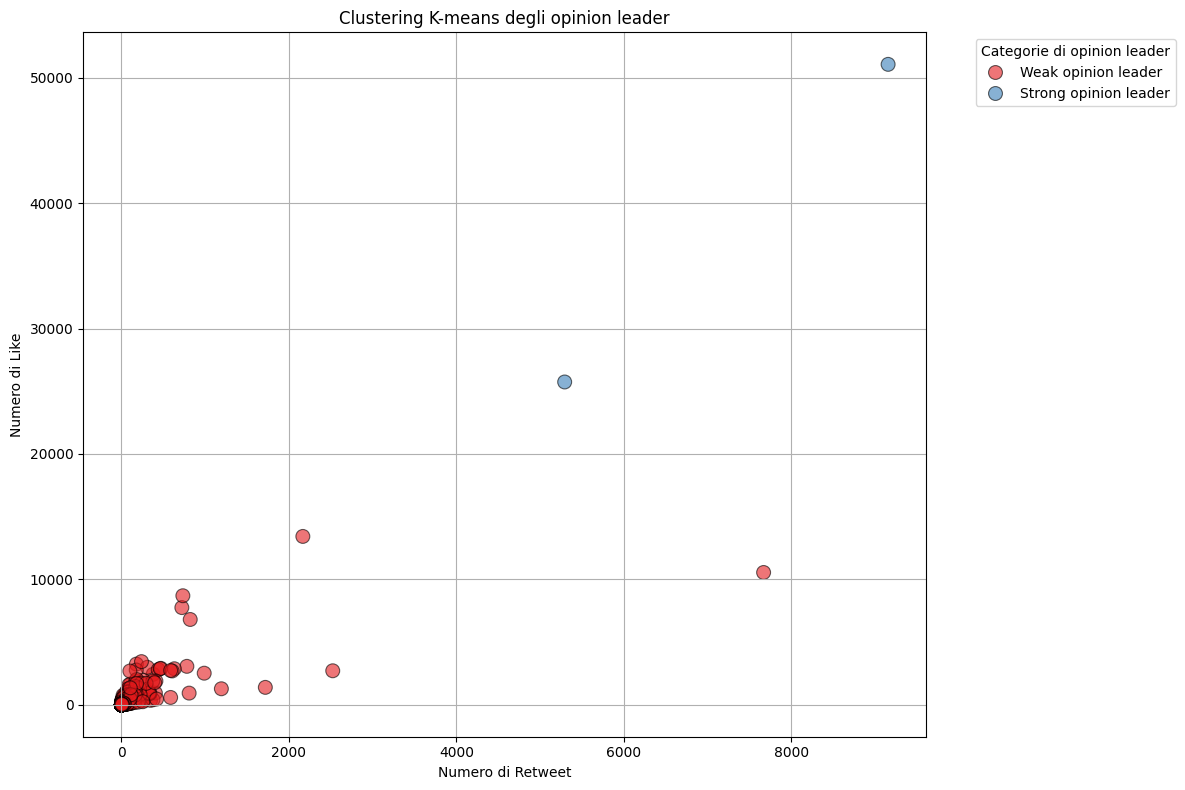

In [41]:
# Grafico dei cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=tweets_picco_0_neg_tid_9032,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black'  # Aggiungiamo bordi neri ai punti
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()